Import Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

Load and Explore the Data:

In [2]:
# Assuming 'cac_data.csv' is the file containing the CAC stock price data
cac_data = pd.read_csv('database.csv')

# Display the first few rows of the dataset
print(cac_data.head())


         Date    Open    High     Low   Close  Adj Close  Volume
0  1990-03-01  1836.0  1838.0  1827.0  1832.0     1832.0     0.0
1  1990-03-02  1831.0  1860.0  1831.0  1860.0     1860.0     0.0
2  1990-03-05  1866.0  1874.0  1862.0  1874.0     1874.0     0.0
3  1990-03-06  1869.0  1875.0  1866.0  1872.0     1872.0     0.0
4  1990-03-07  1874.0  1881.0  1874.0  1880.0     1880.0     0.0


Data Preprocessing:
Preprocess the data by converting dates to the appropriate datetime format and handling missing values, if any

In [3]:
# Convert 'Date' column to datetime format
cac_data['Date'] = pd.to_datetime(cac_data['Date'])

# Handle missing values if any
cac_data.dropna(inplace=True)


Visualization:

Plot the stock price over time to visualize trends and patterns.

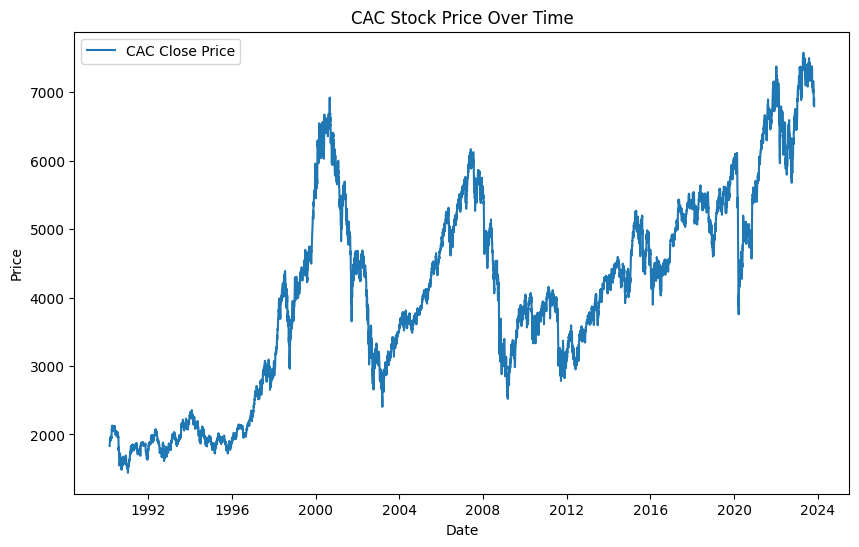

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(cac_data['Date'], cac_data['Close'], label='CAC Close Price')
plt.title('CAC Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Split Data into Training and Test Sets:

Split the data into training and test sets for model training and evaluation.

In [6]:
# Split the data (80% training, 20% test)
train_data, test_data = train_test_split(cac_data, test_size=0.2, shuffle=False,random_state=42)


Model Training with SGDRegressor:

Train a simple linear regression model using Stochastic Gradient Descent.

In [7]:
# Prepare the features and target variable
X_train = train_data['Date'].values.reshape(-1, 1)  # Assuming Date is used as a feature
y_train = train_data['Close'].values

# Initialize and train the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train, y_train)


SGDRegressor()

Model Evaluation:

Evaluate the model's performance on the test set.

In [8]:
# Prepare test features and make predictions
X_test = test_data['Date'].values.reshape(-1, 1)
y_test = test_data['Close'].values
predicted_prices = sgd_regressor.predict(X_test)

# Evaluate the model (you can use appropriate metrics)
# For example, calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted_prices)
print(f"Mean Squared Error: {mse}")


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

Prediction and Visualization:

Use the trained model to make predictions and visualize the predicted values.

In [1]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Price')
plt.plot(test_data['Date'], predicted_prices, label='Predicted Price', linestyle='--')
plt.title('CAC Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'plt' is not defined